
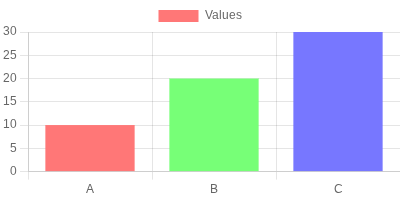

In [1]:
importScripts('https://cdn.jsdelivr.net/npm/chart.js');

const canvas = new OffscreenCanvas(400, 200);
const ctx = canvas.getContext('2d');

// Create a chart
new Chart(ctx, {
  type: 'bar',
  data: {
    labels: ['A', 'B', 'C'],
    datasets: [
      {
        label: 'Values',
        data: [10, 20, 30],
        backgroundColor: ['#f77', '#7f7', '#77f']
      }
    ]
  },
  options: {
    animation: false,
    responsive: false
  }
});


const blob = await canvas.convertToBlob({ type: 'image/png' });
const buffer = await blob.arrayBuffer();
const base64 = btoa(String.fromCharCode(...new Uint8Array(buffer)));
const htmlString = `<img src="data:image/png;base64,${base64}" width="400" height="200" alt="Chart"/>`;
ijs.display.html(htmlString);

In [2]:
importScripts(
  'https://cdn.jsdelivr.net/npm/vega@5',
  'https://cdn.jsdelivr.net/npm/vega-lite@5'
);

const spec = {
  mark: 'bar',
  data: { values: [{ x: 'A', y: 10 }, { x: 'B', y: 20 }, { x: 'C', y: 30 }] },
  encoding: {
    x: { field: 'x', type: 'ordinal' }, // categorical axis
    y: { field: 'y', type: 'quantitative' }, // numeric axis
  }
};

const runtime = vega.parse(vegaLite.compile(spec).spec);
const view = new vega.View(runtime, { renderer: 'none' });

const svg = await view.toSVG();
ijs.display.html(svg);


A B C x 0 5 10 15 20 25 30 y